In [55]:
import pandas as pd
import json
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
jsonFile = open("./log/result.json", 'r')
data = json.load(jsonFile)

In [68]:
task_df = pd.DataFrame(data['task']).T
task_df['last_update_time'] = pd.to_datetime(task_df['last_update_time'], unit='ms')
task_df['create_time'] = pd.to_datetime(task_df['create_time'], unit='ms')
task_df['wait_alloc_time'] /= 60000
task_df['wait_vehicle_time'] /= 60000
task_df['wait_total_time'] = task_df['wait_alloc_time'] + task_df['wait_vehicle_time']

# to koran time
task_df['last_update_time'] = pd.DatetimeIndex(task_df['last_update_time'] + timedelta(hours=9))
task_df['create_time'] = pd.DatetimeIndex(task_df['create_time'] + timedelta(hours=9))

In [77]:
grouping_df = task_df.groupby([pd.Grouper(key='create_time',freq='1H')])['wait_vehicle_time', 'wait_alloc_time', 'wait_total_time'].mean().reset_index().sort_values(['create_time'])
grouping_df['create_time'] = grouping_df['create_time'].dt.hour

/var/folders/xm/h7qj67pn08v89vfss39pt2980000gn/T/ipykernel_86871/726511240.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouping_df = task_df.groupby([pd.Grouper(key='create_time',freq='1H')])['wait_vehicle_time', 'wait_alloc_time', 'wait_total_time'].mean().reset_index().sort_values(['create_time'])


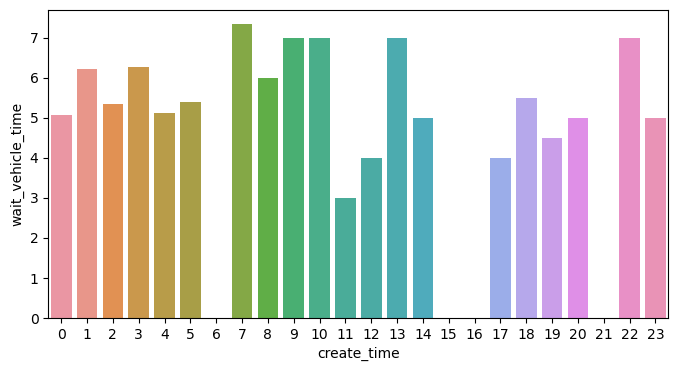

In [91]:
plot1 = plt.figure(figsize = (8,4))
sns.barplot(x = 'create_time', y = 'wait_vehicle_time',data = grouping_df)
#sns.lineplot(x = 'create_time', y='wait_alloc_time', data = grouping_df)
plt.savefig("../img/wait_vehicle_time.png")

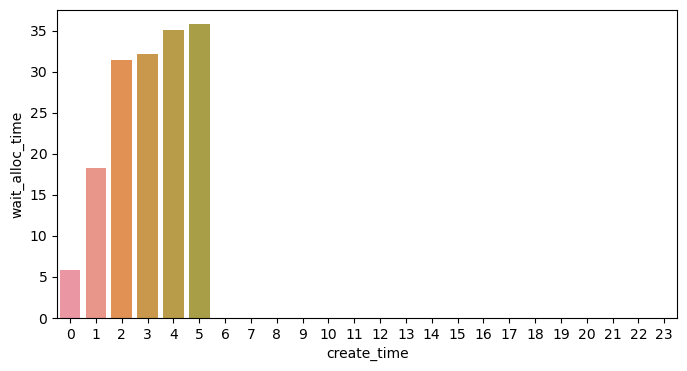

In [92]:
plt2 = plt.figure(figsize = (8,4))
sns.barplot(x = 'create_time', y = 'wait_alloc_time',data = grouping_df)
plt.savefig("../img/wait_alloc_time.png")

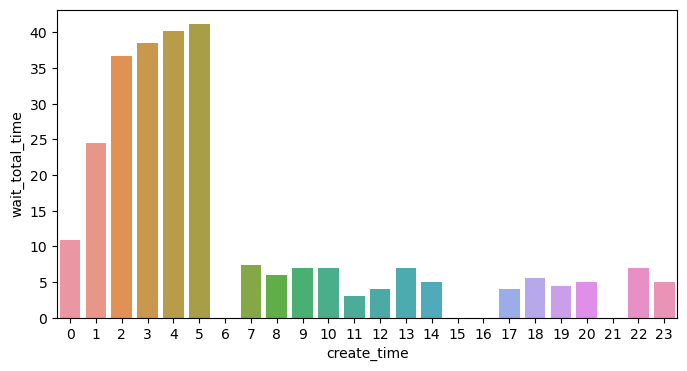

In [93]:
plt3 = plt.figure(figsize = (8,4))
sns.barplot(x = 'create_time', y = 'wait_total_time',data = grouping_df)
plt.savefig("../img/wait_total_time.png")